Step 1: Imports and loading the dataset

In [132]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
dataset = pd.read_csv('heart.csv')
dataset.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Step 2: Preprocessing

In [43]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [54]:
category_columns = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

unique_categories = [dataset[category].unique() for category in category_columns]

print(unique_categories)

[array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object), array(['Normal', 'ST', 'LVH'], dtype=object), array(['N', 'Y'], dtype=object), array(['Up', 'Flat', 'Down'], dtype=object)]


In [55]:
modifier_dicts = []

for category in category_columns:
    temp_dict = dataset.groupby(category)['HeartDisease'].mean().to_dict()
    modifier_dicts.append(temp_dict)

print(modifier_dicts)

[{'ASY': 0.7903225806451613, 'ATA': 0.13872832369942195, 'NAP': 0.35467980295566504, 'TA': 0.43478260869565216}, {'LVH': 0.5638297872340425, 'Normal': 0.5163043478260869, 'ST': 0.6573033707865169}, {'N': 0.3510054844606947, 'Y': 0.8517520215633423}, {'Down': 0.7777777777777778, 'Flat': 0.8282608695652174, 'Up': 0.19746835443037974}]


In [65]:
dataset_modified = dataset.copy()

for idx, category in enumerate(category_columns):
    dataset_modified[category] = dataset_modified[category].map(modifier_dicts[idx])

dataset_modified.head()

ChestPainType0
RestingECG1
ExerciseAngina2
ST_Slope3


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,0.138728,140,289,0,0.516304,172,0.351005,0.0,0.197468,0
1,49,F,0.354680,160,180,0,0.516304,156,0.351005,1.0,0.828261,1
2,37,M,0.138728,130,283,0,0.657303,98,0.351005,0.0,0.197468,0
3,48,F,0.790323,138,214,0,0.516304,108,0.851752,1.5,0.828261,1
4,54,M,0.354680,150,195,0,0.516304,122,0.351005,0.0,0.197468,0


In [66]:
sex_dict = {'M': 0, 'F': 1}

dataset_modified['Sex'] = dataset_modified['Sex'].map(sex_dict)
dataset_modified.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0.138728,140,289,0,0.516304,172,0.351005,0.0,0.197468,0
1,49,1,0.354680,160,180,0,0.516304,156,0.351005,1.0,0.828261,1
2,37,0,0.138728,130,283,0,0.657303,98,0.351005,0.0,0.197468,0
3,48,1,0.790323,138,214,0,0.516304,108,0.851752,1.5,0.828261,1
4,54,0,0.354680,150,195,0,0.516304,122,0.351005,0.0,0.197468,0


In [84]:
data = dataset_modified.to_numpy()
inputs = data[:, :-1]
outputs = data[:, -1]

input_train, input_test, output_train, output_test = train_test_split(inputs, outputs, test_size = 0.2, random_state = 0)

In [89]:
print(input_train.shape)
print(output_train.shape)

print(input_test.shape)
print(output_test.shape)

(734, 11)
(734,)
(184, 11)
(184,)


Step 3: Building our model

In [94]:
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(input_train, output_train)

DecisionTreeClassifier()

In [130]:
predictions = tree_classifier.predict(input_test)
observations = output_test

accuracy = accuracy_score(observations, predictions)
print(accuracy)

0.7608695652173914


Step 4: Visualisation

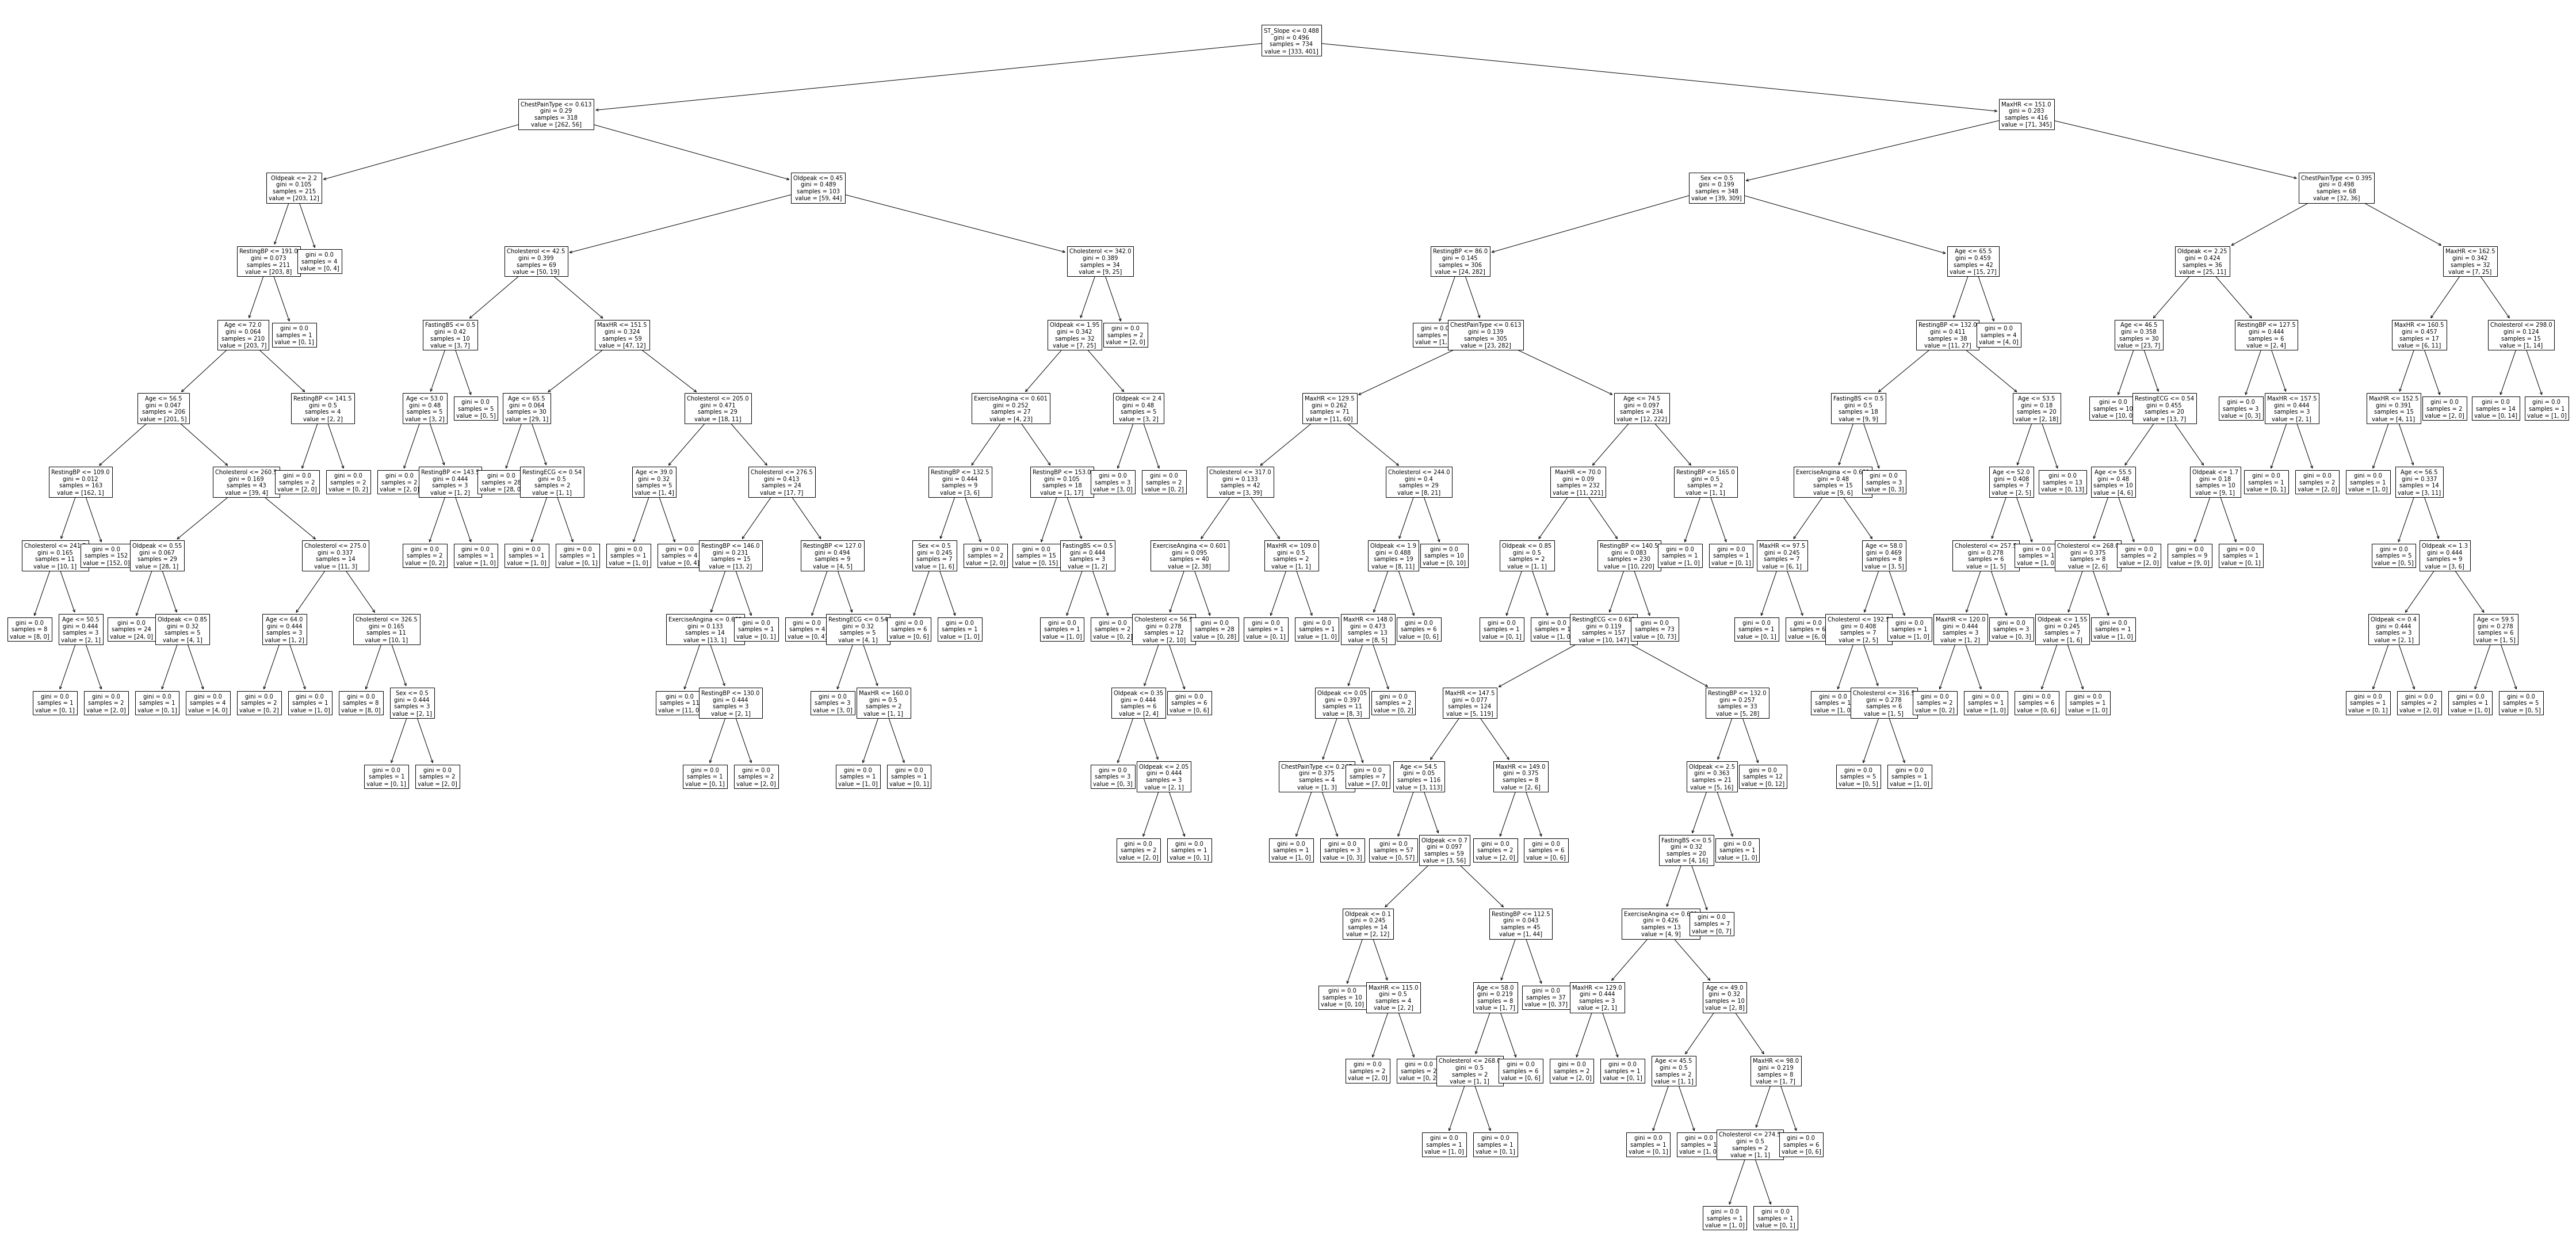

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize = (80, 40))

feature_names = np.array(dataset.columns[:-1])
tree.plot_tree(tree_classifier, feature_names = feature_names, fontsize = 10)

plt.savefig("tree.png", dpi = 100)